In [7]:
parkinsons_df = pd.read_csv('parkinsons.data')

In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Carregando o conjunto de dados
parkinsons_df = pd.read_csv('parkinsons.data')

# Convertendo a coluna "status" para uma variável categórica
parkinsons_df['status'] = pd.Categorical(parkinsons_df['status'])
parkinsons_df = parkinsons_df.drop(columns=['name'])

# Separando as variáveis independentes e dependentes
X = parkinsons_df.drop(columns=['status']).values
y = parkinsons_df['status'].cat.codes.values

# Padronizando as variáveis independentes
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando a rede recorrente
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando a rede
model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=50, batch_size=32)

# Avaliando a rede no conjunto de teste
test_loss, test_acc = model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test, verbose=0)
print('Test accuracy:', test_acc)


Epoch 1/50
5/5 [==============================] - 2s 9ms/step - loss: 0.6636 - accuracy: 0.7308
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 0.6161 - accuracy: 0.7436
Epoch 3/50
5/5 [==============================] - 0s 10ms/step - loss: 0.5568 - accuracy: 0.7500
Epoch 4/50
5/5 [==============================] - 0s 20ms/step - loss: 0.4974 - accuracy: 0.7500
Epoch 5/50
5/5 [==============================] - 0s 14ms/step - loss: 0.4565 - accuracy: 0.7500
Epoch 6/50
5/5 [==============================] - 0s 12ms/step - loss: 0.4304 - accuracy: 0.7821
Epoch 7/50
5/5 [==============================] - 0s 12ms/step - loss: 0.4124 - accuracy: 0.8141
Epoch 8/50
5/5 [==============================] - 0s 11ms/step - loss: 0.3952 - accuracy: 0.8269
Epoch 9/50
5/5 [==============================] - 0s 10ms/step - loss: 0.3807 - accuracy: 0.8013
Epoch 10/50
5/5 [==============================] - 0s 12ms/step - loss: 0.3607 - accuracy: 0.8333
Epoch 11/50
5/5 [=============

In [122]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 64)                16896     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from scipy import interp
from scipy.interpolate import interp1d

# Carregando o conjunto de dados
parkinsons_df = pd.read_csv('parkinsons.data')

# Convertendo a coluna "status" para uma variável categórica
parkinsons_df['status'] = pd.Categorical(parkinsons_df['status'])
parkinsons_df = parkinsons_df.drop(columns=['name'])

# Separando as variáveis independentes e dependentes
X = parkinsons_df.drop(columns=['status']).values
y = parkinsons_df['status'].cat.codes.values

# Padronizando as variáveis independentes
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando a rede recorrente
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando a rede
history = model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=50, batch_size=32)

# Salvando a rede treinada
model.save('parkinsons_lstm.h5')

# Avaliando a rede no conjunto de teste
y_pred = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
y_pred_binary = np.round(y_pred)
test_acc = accuracy_score(y_test, y_pred_binary)
test_prec = precision_score(y_test, y_pred_binary)
test_rec = recall_score(y_test, y_pred_binary)
test_f1 = f1_score(y_test, y_pred_binary)

Epoch 1/50
5/5 [==============================] - 4s 23ms/step - loss: 0.6841 - accuracy: 0.6346
Epoch 2/50
5/5 [==============================] - 0s 25ms/step - loss: 0.6308 - accuracy: 0.8013
Epoch 3/50
5/5 [==============================] - 0s 25ms/step - loss: 0.5385 - accuracy: 0.7564
Epoch 4/50
5/5 [==============================] - 0s 24ms/step - loss: 0.4605 - accuracy: 0.7308
Epoch 5/50
5/5 [==============================] - 0s 24ms/step - loss: 0.4265 - accuracy: 0.7436
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 0.3938 - accuracy: 0.8013
Epoch 7/50
5/5 [==============================] - 0s 22ms/step - loss: 0.3733 - accuracy: 0.8269
Epoch 8/50
5/5 [==============================] - 0s 22ms/step - loss: 0.3486 - accuracy: 0.8526
Epoch 9/50
5/5 [==============================] - 0s 23ms/step - loss: 0.3532 - accuracy: 0.8462
Epoch 10/50
5/5 [==============================] - 0s 24ms/step - loss: 0.3390 - accuracy: 0.8269
Epoch 11/50
5/5 [============

2/2 [==============================] - 0s 10ms/step


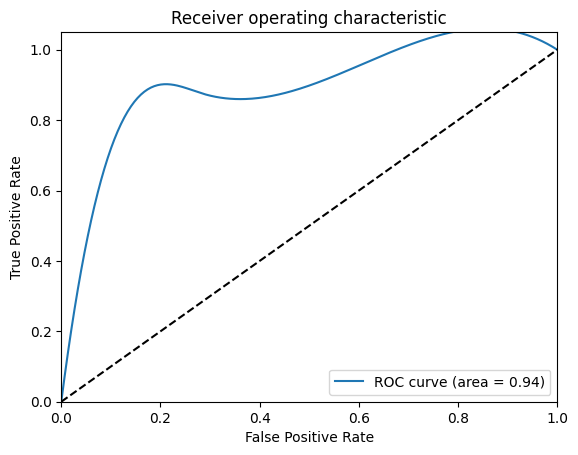

In [160]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline, BSpline
from scipy import interpolate


# Calculando a curva ROC no conjunto de teste
y_pred_prob = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Interpolando valores para suavizar a curva ROC
n_interp_points = 300
fpr_unique, indices = np.unique(fpr, return_index=True)
tpr_unique = tpr[indices]
spline = make_interp_spline(fpr_unique, tpr_unique, k=3)
fpr_interp = np.linspace(fpr_unique.min(), 1, n_interp_points)
tpr_interp = spline(fpr_interp)

# Plotando a curva ROC suavizada
plt.plot(fpr_interp, tpr_interp, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [131]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculando as métricas de avaliação da classificação no conjunto de teste
y_pred = (y_pred_prob > 0.5).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)

# Imprimindo as métricas em uma tabela LaTeX
print("\\begin{table}[htb]")
print("\\centering")
print("\\begin{tabular}{c|c}")
print("\\textbf{Métrica} & \\textbf{Valor} \\\\")
print("\\hline")
print("Acurácia & {:.2f}\\% \\\\".format(test_acc * 100))
print("Precisão & {:.2f}\\% \\\\".format(precision * 100))
print("Revocação & {:.2f}\\% \\\\".format(recall * 100))
print("F1-Score & {:.2f}\\% \\\\".format(f1_score * 100))
print("\\end{tabular}")
print("\\caption{Métricas de avaliação da classificação no conjunto de teste.}")
print("\\label{tab:metrics}")
print("\\end{table}")

\begin{table}[htb]
\centering
\begin{tabular}{c|c}
\textbf{Métrica} & \textbf{Valor} \\
\hline
Acurácia & 89.74\% \\
Precisão & 93.75\% \\
Revocação & 93.75\% \\
F1-Score & 93.75\% \\
\end{tabular}
\caption{Métricas de avaliação da classificação no conjunto de teste.}
\label{tab:metrics}
\end{table}
